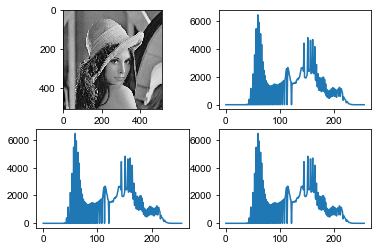

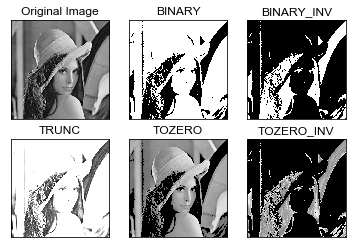

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#cv2.threshhold()这个函数的第一个参数就是原图像，原图 像应该是灰度图。第二个参数就是用来对像素值进行分类的阈值。
#第三个参数 就是当像素值高于(有时是小于)阈值时应该被赋予的新的像素值。
#OpenCV 提供了多种不同的阈值方法，这是有第四个参数来决定的。这些方法包括:
#• cv2.THRESH_BINARY
#• cv2.THRESH_BINARY_INV 
#• cv2.THRESH_TRUNC
#• cv2.THRESH_TOZERO
#• cv2.THRESH_TOZERO_INV

def calcAndDrawHist(image, color):    
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])    
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)    
    histImg = np.zeros([256,256,3], np.uint8)    
    hpt = int(0.9* 256);    
        
    for h in range(256):    
        intensity = int(hist[h]*hpt/maxVal)    
        cv2.line(histImg,(h,256), (h,256-intensity), color)    
            
    return histImg;   

img=cv2.imread('/Users/ylshan/Documents/python/视觉/opencv/data/lenna.png',0)#直接读为灰度图像 

#opencv方法读取-cv2.calcHist（速度最快）
#图像，通道[0]-灰度图，掩膜-无，灰度级，像素范围
hist_cv = cv2.calcHist([img],[0],None,[256],[0,256])
#numpy方法读取-np.histogram()
hist_np,bins = np.histogram(img.ravel(),256,[0,256])
#numpy的另一种方法读取-np.bincount()（速度=10倍法2）
hist_np2 = np.bincount(img.ravel(),minlength=256)
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.plot(hist_cv)
plt.subplot(223),plt.plot(hist_np)
plt.subplot(224),plt.plot(hist_np2)
plt.show()

ret,thresh1=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,100,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,100,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6): 
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray') 
    plt.title(titles[i]) 
    plt.xticks([])
    plt.yticks([])
    
plt.show()